# PRACTICAL 10: Apply Decision Tree and Random Forest on Crime dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
df = pd.read_excel('3B.1 Crime against Women in Metropolitan Cities.xlsx')
df.rename(columns = {2018:'Year_2018',2019:'Year_2019',2020:'Year_2020'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City                                      20 non-null     object 
 1   Year_2018                                 20 non-null     int64  
 2   Year_2019                                 20 non-null     int64  
 3   Year_2020                                 20 non-null     int64  
 4   Actual Population (in Lakhs) (2011)       20 non-null     float64
 5   Rate of Total Crime against Women (2020)  20 non-null     float64
 6   Chargesheeti ng Rate (2020)               20 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.2+ KB


In [21]:
index = df['City'][0:19]
df = df[0:19].set_index('City')

df['Total Crime Rate > 50'] = (df['Rate of Total Crime against Women (2020)'] > 50)
df['Total Crime Rate > 50'] = df['Total Crime Rate > 50'].map({True:'yes', False:'no'})

df.drop(['Chargesheeti ng Rate (2020)','Rate of Total Crime against Women (2020)'],axis=1,inplace=True)

df.head(3).transpose()

City,Ahmedabad\n(Gujarat),Bengaluru\n(Karnataka),Chennai\n(Tamil Nadu)
Year_2018,1416,3427,761
Year_2019,1633,3486,729
Year_2020,1524,2730,576
Actual Population (in Lakhs) (2011),30.0,40.6,43.1
Total Crime Rate > 50,yes,yes,no


**10.1. Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [23]:
# 30% testing data and 70% training data 

features = ['Year_2018', 'Year_2019', 'Year_2020','Actual Population (in Lakhs) (2011)']

X = df[features].values
y = df['Total Crime Rate > 50'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
# building the model

model_dt = DecisionTreeClassifier(criterion='log_loss',random_state=101)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=101)

In [25]:
# making predictions

pred_train = model_dt.predict(X_train)
pred_test = model_dt.predict(X_test)

In [26]:
# evaluating model performance on training data

print('Confusion matrix and Classification report for training data:\n\n',confusion_matrix(y_train,pred_train),'\n')
print(classification_report(y_train,pred_train))

Confusion matrix and Classification report for training data:

 [[6 0]
 [0 7]] 

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         6
         yes       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [27]:
# evaluating model performance on testing data

print('Confusion matrix and Classification report for testing data:\n\n',confusion_matrix(y_test,pred_test),'\n')
print(classification_report(y_test,pred_test))

Confusion matrix and Classification report for testing data:

 [[2 0]
 [1 3]] 

              precision    recall  f1-score   support

          no       0.67      1.00      0.80         2
         yes       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



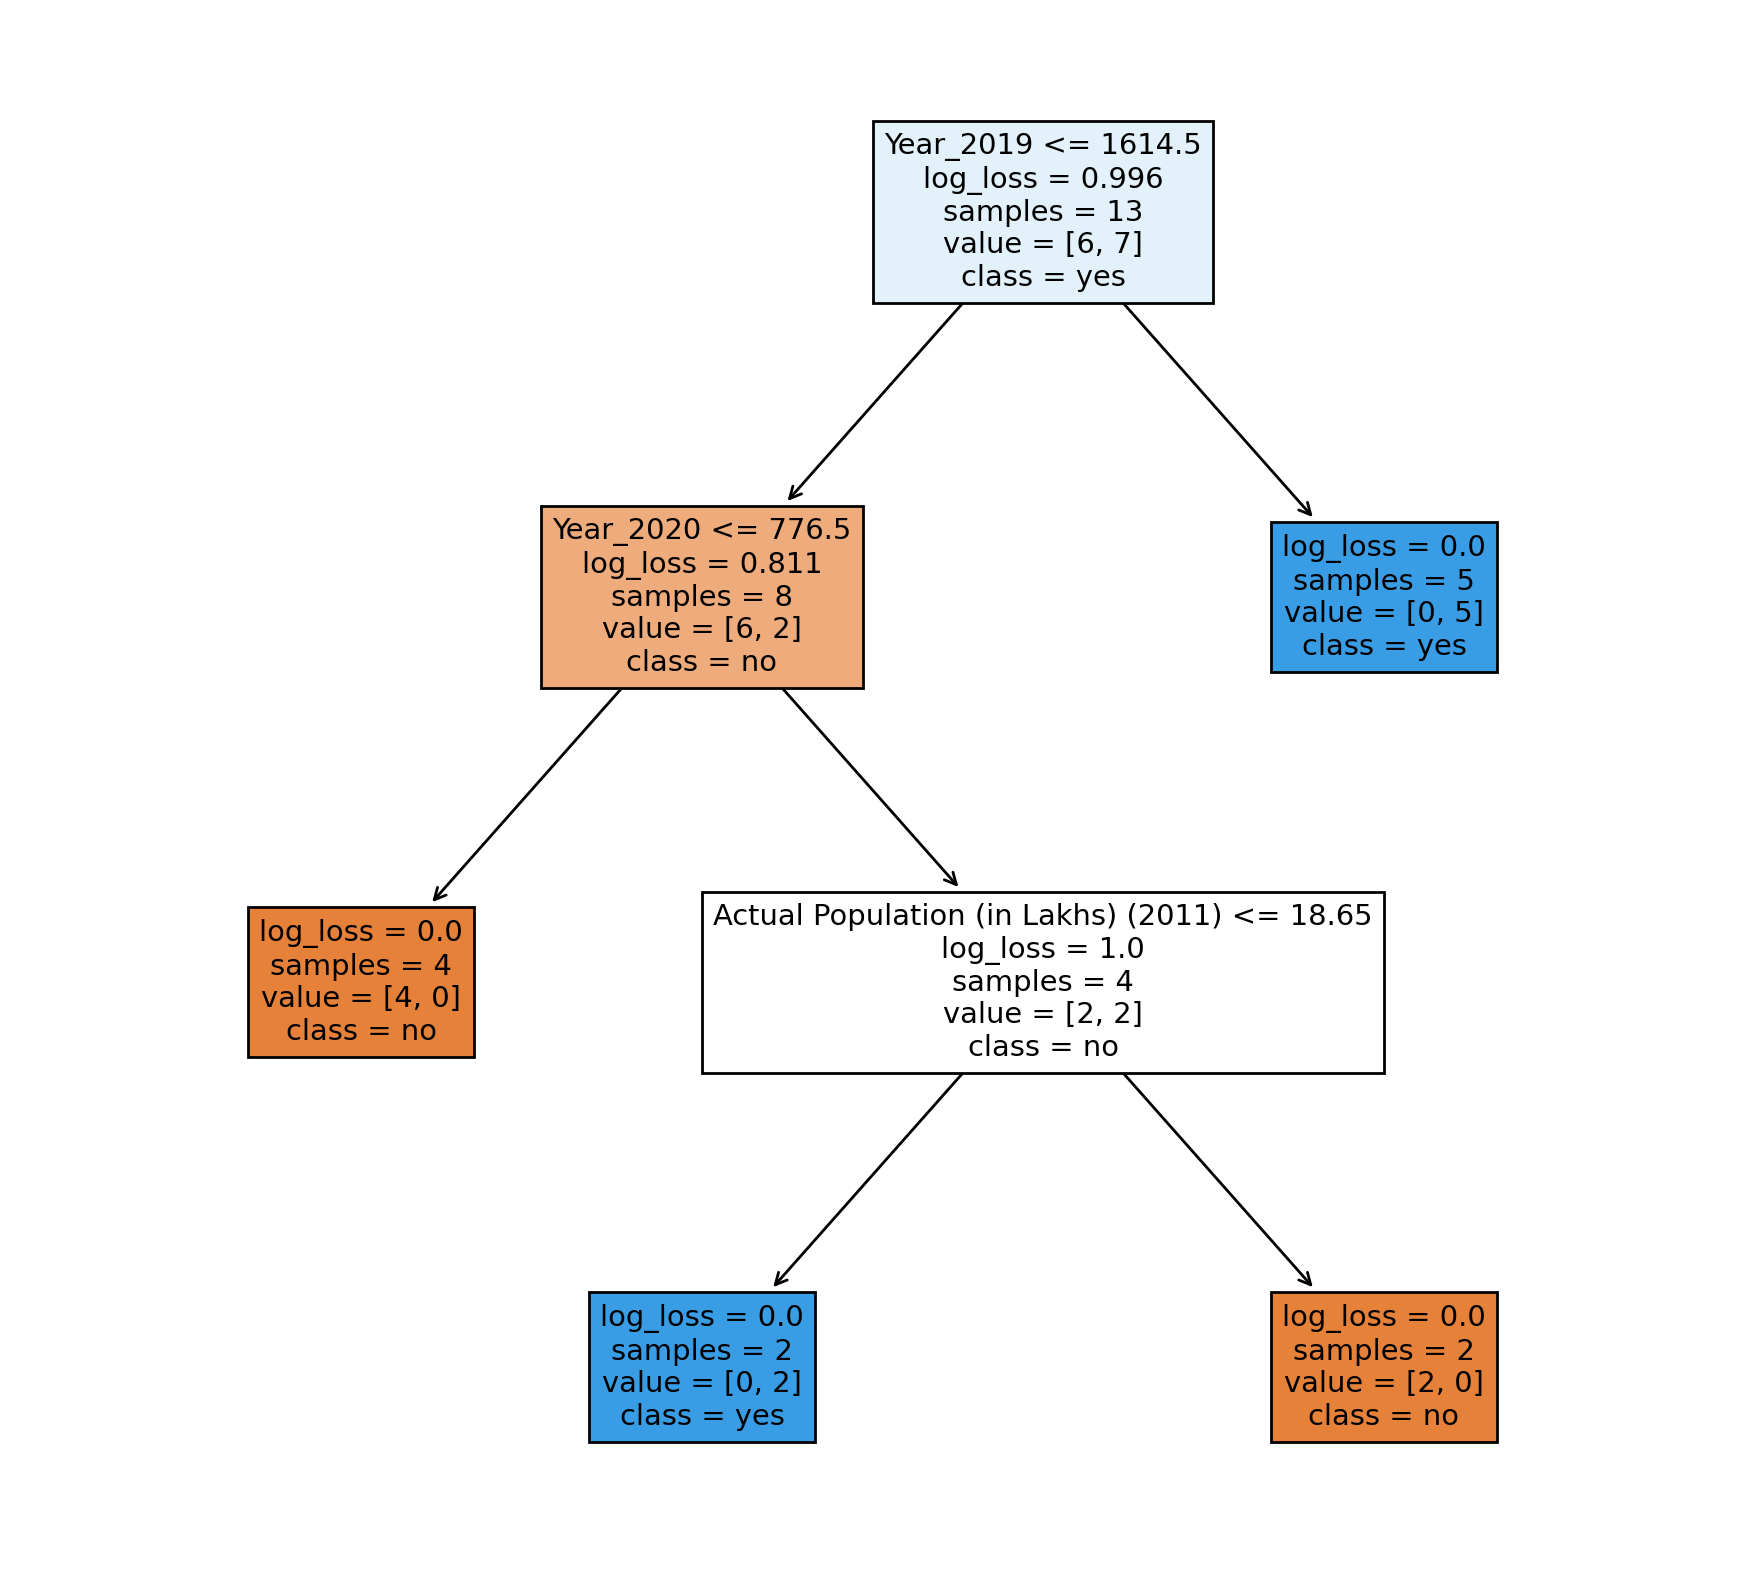

In [28]:
plt.figure(figsize=(11,10),dpi=200)
tree.plot_tree(model_dt, feature_names = features, class_names = targets, filled = True)
plt.show()

**10.2. Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_rf = RandomForestClassifier(n_estimators = 1000, random_state = 101)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=101)

In [31]:
pred_train = model_dt.predict(X_train)
pred_test = model_dt.predict(X_test)

In [32]:
print('Confusion matrix and Classification report for training data:\n\n',confusion_matrix(y_train,pred_train),'\n')
print(classification_report(y_train,pred_train))

Confusion matrix and Classification report for training data:

 [[6 0]
 [0 7]] 

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         6
         yes       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [33]:
print('Confusion matrix and Classification report for testing data:\n\n',confusion_matrix(y_test,pred_test),'\n')
print(classification_report(y_test,pred_test))

Confusion matrix and Classification report for testing data:

 [[2 0]
 [1 3]] 

              precision    recall  f1-score   support

          no       0.67      1.00      0.80         2
         yes       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

